**Load the Data**

In [1]:
import pandas as pd

# Load the datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

# Display the first few rows of each dataset
print(train.head())
print(test.head())
print(sample_submission.head())


                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  
                      ID        date     Item Id  \
0  2024-07-01_B09KDR64LT  2024-07-01  B0

**Exploratory Data Analysis (EDA)**

                                date      ad_spend         units  \
count                         101490  77303.000000  83592.000000   
mean   2023-07-09 19:17:37.120898560    110.771470     10.284381   
min              2022-04-12 00:00:00      0.000000   -173.000000   
25%              2023-02-26 00:00:00      0.000000      0.000000   
50%              2023-07-16 00:00:00      4.230000      1.000000   
75%              2023-12-13 00:00:00     44.310000      5.000000   
max              2024-05-31 00:00:00  47934.990000   9004.000000   
std                              NaN    529.303777     68.945915   

          unit_price  
count  101490.000000  
mean      106.750922  
min     -8232.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max     21557.390000  
std       425.704733  
                                date      ad_spend   unit_price
count                           2833   1382.000000  2833.000000
mean   2024-07-13 16:54:33.420402176    198.838032  

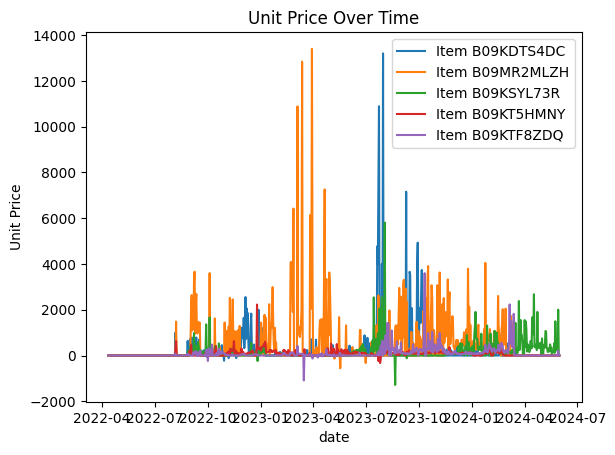

In [4]:
import matplotlib.pyplot as plt

# Convert the Date column to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Summary statistics
print(train.describe())
print(test.describe())

# Check for missing values
print(train.isnull().sum())
print(test.isnull().sum())

# Plot the time series for a few items
for item_id in train['Item Id'].unique()[:5]:
    item_data = train[train['Item Id'] == item_id]
    plt.plot(item_data['date'], item_data['unit_price'], label=f'Item {item_id}')

plt.xlabel('date')
plt.ylabel('Unit Price')
plt.title('Unit Price Over Time')
plt.legend()
plt.show()


**Feature Engineering**

In [5]:
# Create additional time-based features
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek
train['week_of_year'] = train['date'].dt.isocalendar().week

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek
test['week_of_year'] = test['date'].dt.isocalendar().week

# Fill any missing values if necessary
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)


**Model Selection**

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Function to train and predict using ARIMA
def train_and_predict(item_data, steps):
    model = ARIMA(item_data['unit_price'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Generate predictions for the test set
predictions = []

for item_id in test['Item Id'].unique():
    item_train_data = train[train['Item Id'] == item_id].set_index('date')
    item_test_data = test[test['Item Id'] == item_id].set_index('date')
    forecast = train_and_predict(item_train_data, steps=len(item_test_data))
    for i, f in enumerate(forecast):
        predictions.append([item_id, item_test_data.index[i], f])

# Convert predictions to a DataFrame
pred_df = pd.DataFrame(predictions, columns=['Item Id', 'date', 'predicted_units'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

**Hyperparameter Tuning**

In [12]:
from sklearn.metrics import mean_squared_error

# Generate predictions for the test set
predictions = []

for item_id in test['Item Id'].unique():
    item_train_data = train[train['Item Id'] == item_id].set_index('date')
    item_test_data = test[test['Item Id'] == item_id].set_index('date')
    forecast = auto_train_and_predict(item_train_data, steps=len(item_test_data))
    for i, f in enumerate(forecast):
        predictions.append([item_id, item_test_data.index[i], f])

# Convert predictions to a DataFrame
pred_df = pd.DataFrame(predictions, columns=['Item Id', 'date', 'predicted_units'])

# Calculate MSE for each item and overall
mse_list = []
for item_id in test['Item Id'].unique():
    item_test_data = test[test['Item Id'] == item_id]
    item_pred_data = pred_df[pred_df['Item Id'] == item_id]
    mse = mean_squared_error(item_test_data['unit_price'], item_pred_data['predicted_units'])
    mse_list.append(mse)

overall_mse = sum(mse_list) / len(mse_list)
print(f'Overall MSE: {overall_mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

Overall MSE: 98779.85959488466


**Generating Predictions**

In [13]:
# Merge predictions with the sample submission format
final_predictions = sample_submission.copy()
final_predictions['units'] = pred_df['predicted_units']

# Save to CSV
final_predictions.to_csv('/content/predictions.csv', index=False)
